<a href="https://colab.research.google.com/github/Jinwooseol/Deep-learning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Decent

> 볼록함수 (Convex Function)
- 어떤 지점에서 시작하더라도 최적값 (손실함수가 최소)에 도달 가능

> 비볼록함수 (Non-Convex Function)
- 시작점 위치에 따라 다른 최적값에 도달할 수 있음

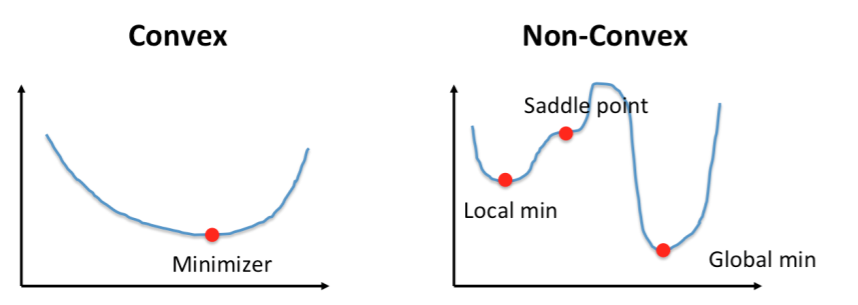

Reference: http://web.cs.ucla.edu/~chohsieh/teaching/CS260_Winter2019/lecture3.pdf

#Gradient Descent
- 스칼라를 벡터로 미분한 것
> $\frac{df(x)}{dx} = lim_{\Delta x \to 0}\frac{f(x + \Delta x) - f(x)}{\Delta x}$

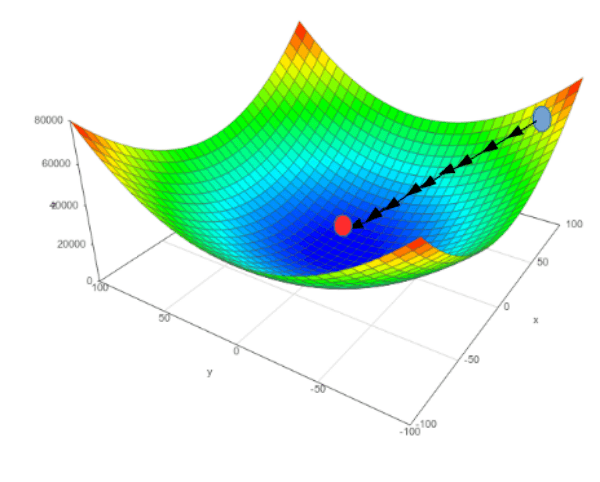

Reference: https://www.commonlounge.com/discussion/f5e5b0b3bba44e5daadb93044e8fa648/history

$\bigtriangledown f(x) = \left ( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ... , \frac{\partial f}{\partial x_N} \right )$
- 변화가 있는 지점에서는 미분값이 존재하고, 변화가 없는 지점에서는 미분값이 0
- 미분값이 클수록 변화량이 크다

#Gradient Descent의 과정
- Gradient descent는 한 스텝마다 미분값에 따라 이동하는 방향을 결정
- $f(x)$의 값이 변하지 않을 때까지 반복
> $x_n = x_{n-1} - \eta \frac{\partial f}{\partial x}$
- $\eta$: 학습률(Learning rate)
- **미분값이 0인 지점을 찾는다!**

#Gradient Descent 구현
> $f_1(x) = x^2$

In [1]:
def f1(x):
  return x**2

def df_dx1(x):
  return 2*x


In [2]:
def gradient_descent(f, df_dx, init_x, learning_rate=0.01, step_num=100):
  x = init_x
  x_log, y_log = [x], [f(x)]

  for i in range(step_num):
    grad = df_dx(x)
    x -= learning_rate * grad

    x_log.append(x)
    y_log.append(f(x))

  return x_log, y_log

#Gradient Descent Visualization

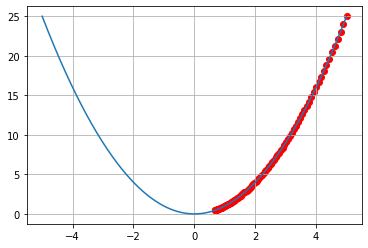

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x_init = 5
x_log, y_log = gradient_descent(f1, df_dx1, init_x=x_init)
plt.scatter(x_log, y_log, color='red')

x = np.arange(-5, 5, 0.01)
plt.plot(x, f1(x))
plt.grid()
plt.show()

#비볼록 함수(Non-Convex Function)에서의 Gradient Descent
> $f_2(x) = 0.01x^4 - 0.3x^3 - 1.0x + 10.0$


In [6]:
def f2(x):
  return 0.01*x**4 - 0.3*x**3 - 1.0*x + 10.0

def df_dx2(x):
  return 0.04*x**3 - 0.9*x**2 - 1.0

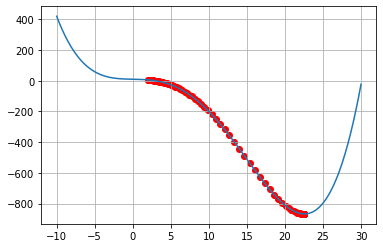

In [9]:
x_init = 2
x_log, y_log = gradient_descent(f2, df_dx2, init_x=x_init)
plt.scatter(x_log, y_log, color='red')

x = np.arange(-10, 30, 0.01)
plt.plot(x, f2(x))
plt.grid()
plt.show()

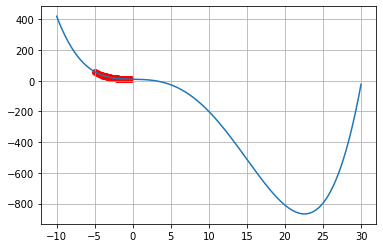

In [10]:
x_init = -5
x_log, y_log = gradient_descent(f2, df_dx2, init_x=x_init)
plt.scatter(x_log, y_log, color='red')

x = np.arange(-10, 30, 0.01)
plt.plot(x, f2(x))
plt.grid()
plt.show()

#전역 최적값 vs 지역 최적값
- 초기값의 위치에 따라 전체 함수의 최솟값 또는 지역 최솟값이 된다.

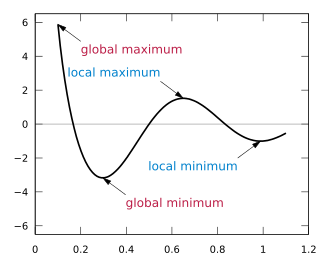

Reference: https://en.wikipedia.org/wiki/Maxima_and_minima

> $f_3(x) = x sin(x^2) + 1$

In [11]:
def f3(x):
  return x*np.sin(x**2) + 1

def df_dx3(x):
  return np.sin(x**2) + x*np.cos(x**2)*2*x

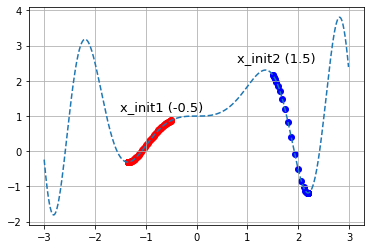

In [13]:
x_init1 = -0.5
x_log1, y_log1 = gradient_descent(f3, df_dx3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')

x_init2 = 1.5
x_log2, y_log2 = gradient_descent(f3, df_dx3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')

x = np.arange(-3, 3, 0.01)
plt.plot(x, f3(x), '--')

plt.scatter(x_init1, f3(x_init1), color='red')
plt.text(x_init1-1.0, f3(x_init1)+0.3, "x_init1 ({})".format(x_init1), fontsize=13)

plt.scatter(x_init2, f3(x_init2), color='blue')
plt.text(x_init2-0.7, f3(x_init2)+0.4, "x_init2 ({})".format(x_init2), fontsize=13)
plt.grid()
plt.show()

#Gradient Descent 구현_2
- Gradient descent를 진행하는 도중, 최솟값에 도달하면 종료

In [38]:
def gradient_descent2(f, df_dx, init_x, learning_rate=0.01, step_num=100):
  eps = 1e-5
  count = 0
  
  old_x = init_x
  min_x = old_x
  min_y = f(min_x)

  x_log, y_log = [min_x], [min_y]
  
  for i in range(step_num):
    grad = df_dx(old_x)
    new_x = old_x - learning_rate * grad
    new_y = f(new_x)

    if min_y > new_y:
      min_x = new_x
      min_y = new_y
    
    if np.abs(old_x - new_x) < eps:
      break

    x_log.append(new_x)
    y_log.append(new_y)
    old_x = new_x
    count += 1

  return x_log, y_log, count

  return 

> $f_3(x) = x sin(x^2) + 1$



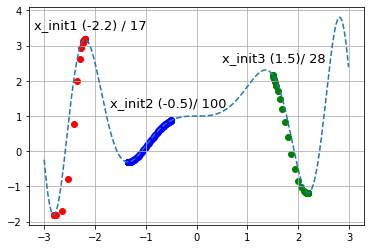

In [19]:
x_init1 = -2.2
x_log1, y_log1, count1 = gradient_descent2(f3, df_dx3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')

x_init2 = -0.5
x_log2, y_log2, count2 = gradient_descent2(f3, df_dx3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')

x_init3 = 1.5
x_log3, y_log3, count3 = gradient_descent2(f3, df_dx3, init_x=x_init3)
plt.scatter(x_log3, y_log3, color='green')

x = np.arange(-3, 3, 0.01)
plt.plot(x, f3(x), '--')

plt.scatter(x_init1, f3(x_init1), color='red')
plt.text(x_init1-1.0, f3(x_init1)+0.3, "x_init1 ({}) / {}".format(x_init1, count1), fontsize=13)

plt.scatter(x_init2, f3(x_init2), color='blue')
plt.text(x_init2-1.2, f3(x_init2)+0.4, "x_init2 ({})/ {}".format(x_init2, count2), fontsize=13)

plt.scatter(x_init3, f3(x_init3), color='green')
plt.text(x_init3-1.0, f3(x_init3)+0.4, "x_init3 ({})/ {}".format(x_init3, count3), fontsize=13)

plt.grid()
plt.show()

#학습률 (Learning Rate)
- 학습률 값이 너무 크면 발산하고, 너무 작으면 학습이 잘 이루어지지 않음

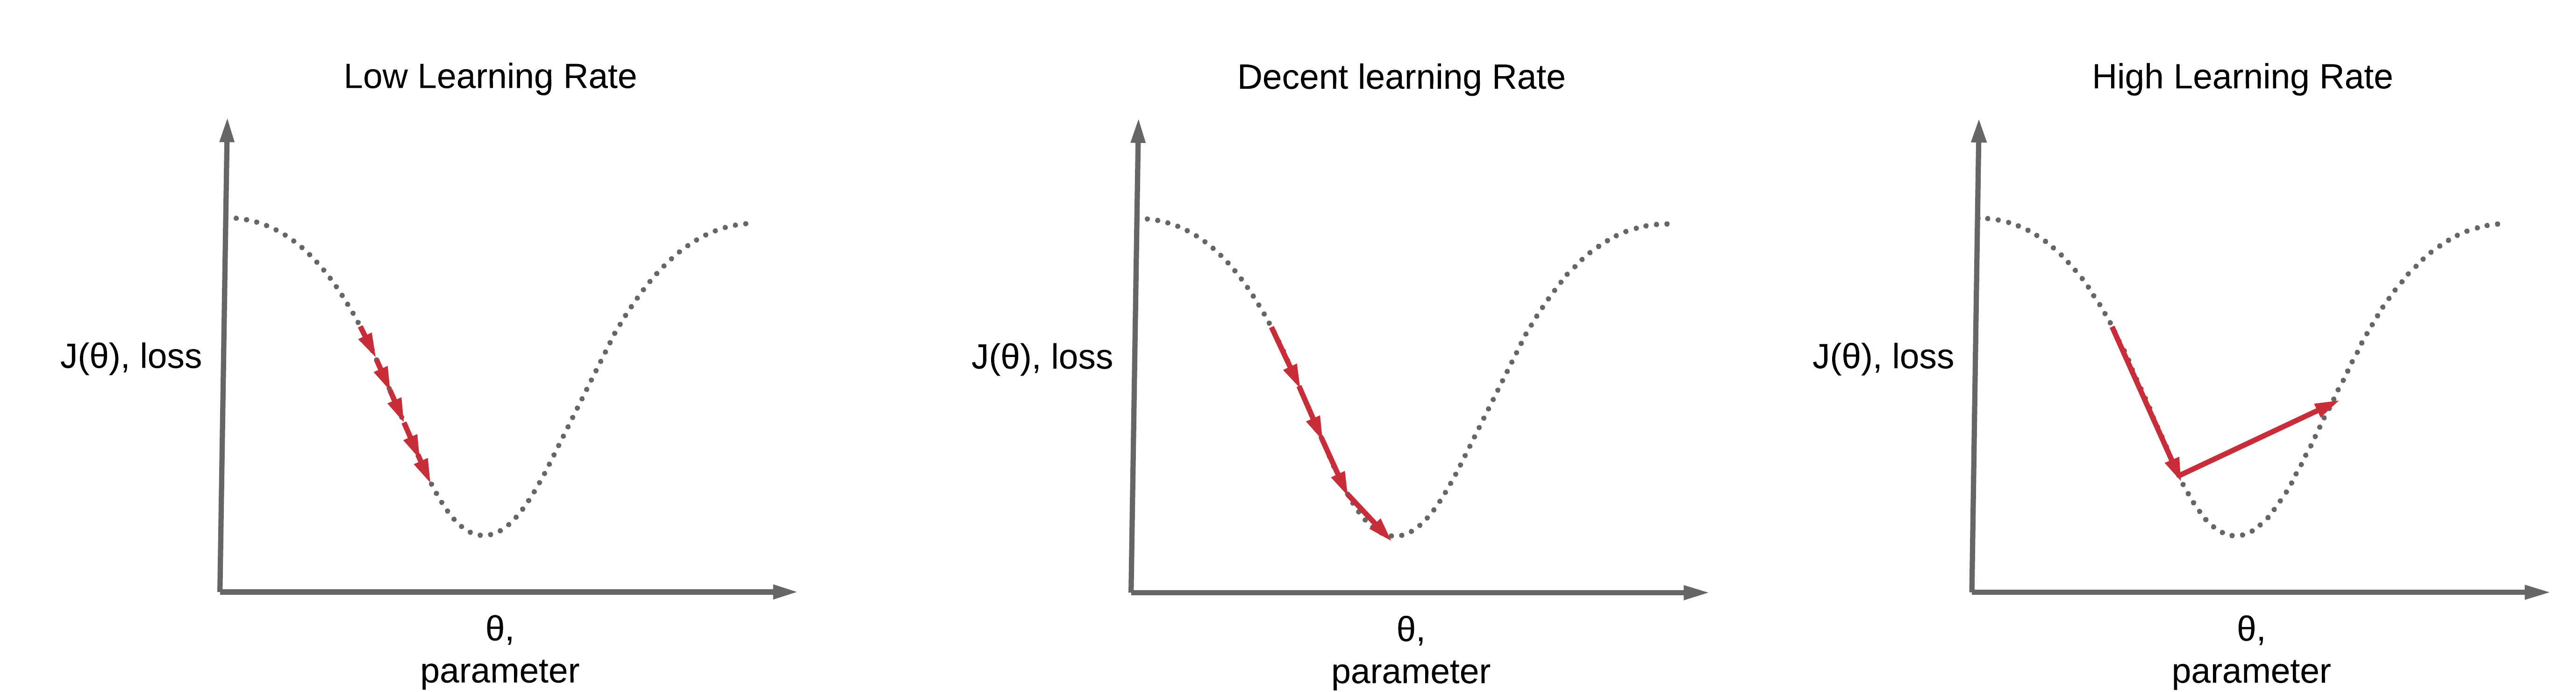

Reference: https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/lr_scheduling/

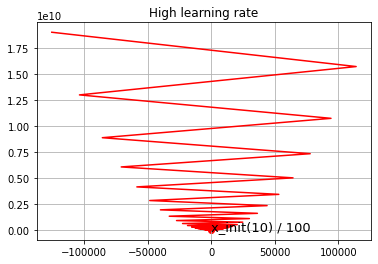

In [23]:
x_init = 10
x_log, y_log, count = gradient_descent2(f1, df_dx1, init_x=x_init, learning_rate=1.05)
plt.plot(x_log, y_log, color='red')

plt.scatter(x_init, f1(x_init), color='red')
plt.text(x_init, f1(x_init)-2, "x_init({}) / {}".format(x_init, count), fontsize=13)
plt.plot(x, f1(x), '--')
plt.title('High learning rate')
plt.grid()
plt.show()

#학습률별 Gradient descent

init value = 0.001, count = 100
init value = 0.01, count = 100
init value = 0.1, count = 60
init value = 1.01, count = 100


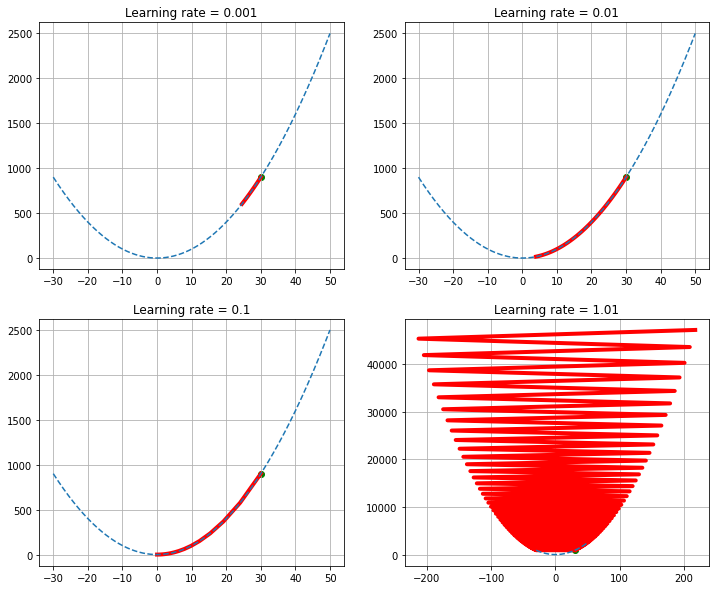

In [39]:
lr_list = [0.001, 0.01, 0.1, 1.01]

x_init = 30.0
x = np.arange(-30, 50, 0.01)
fig = plt.figure(figsize=(12,10))

for i, lr in enumerate(lr_list):
  x_log, y_log, count = gradient_descent2(f1, df_dx1, init_x=x_init, learning_rate=lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(x_init, f1(x_init), color='green')
  ax.plot(x_log, y_log, color='red', linewidth='4')
  ax.plot(x, f1(x), '--')
  ax.grid()
  ax.title.set_text('Learning rate = {}'.format(str(lr)))
  print("init value = {}, count = {}".format(str(lr), str(count)))

plt.show()


#안장점 (Saddle Point)
- 기울기가 0이지만 극값이 되지 않는 점
- Gradient descent는 안정점에서 벗어나지 못함

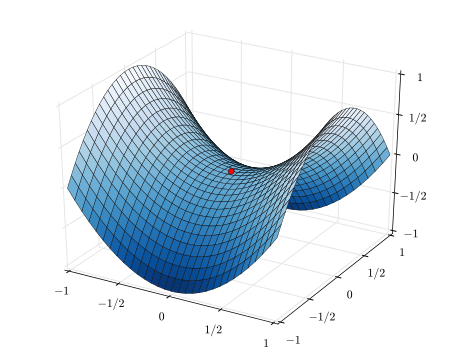

Reference:https://en.wikipedia.org/wiki/Saddle_point

> $f_2(x) = 0.01x^4 - 0.3x^3 - 1.0x + 10.0$ 그래프로 확인
- 첫번째 시작점  
  - count가 100, 

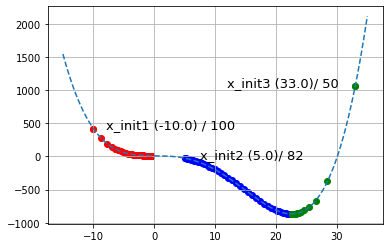

In [51]:
x_init1 = -10.0
x_log1, y_log1, count1 = gradient_descent2(f2, df_dx2, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')

x_init2 = 5.0
x_log2, y_log2, count2 = gradient_descent2(f2, df_dx2, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')

x_init3 = 33.0
x_log3, y_log3, count3 = gradient_descent2(f2, df_dx2, init_x=x_init3)
plt.scatter(x_log3, y_log3, color='green')

x = np.arange(-15, 35, 0.01)
plt.plot(x, f2(x), '--')

plt.scatter(x_init1, f2(x_init1), color='red')
plt.text(x_init1+2.0, f2(x_init1), "x_init1 ({}) / {}".format(x_init1, count1), fontsize=13)

plt.scatter(x_init2, f2(x_init2), color='blue')
plt.text(x_init2+2.5, f2(x_init2)-0.3, "x_init2 ({})/ {}".format(x_init2, count2), fontsize=13)

plt.scatter(x_init3, f2(x_init3), color='green')
plt.text(x_init3-21, f2(x_init3)+0.4, "x_init3 ({})/ {}".format(x_init3, count3), fontsize=13)

plt.grid()
plt.show()

> $f_3(x) = x sin(x^2) + 1$ 그래프로 확인

count1:  17
count2:  100
count3:  17


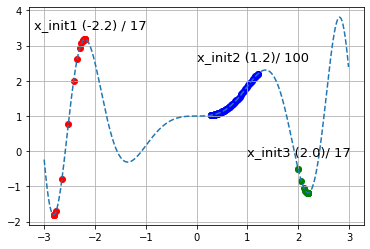

In [53]:
x_init1 = -2.2
x_log1, y_log1, count1 = gradient_descent2(f3, df_dx3, init_x=x_init1)
plt.scatter(x_log1, y_log1, color='red')

x_init2 = 1.2
x_log2, y_log2, count2 = gradient_descent2(f3, df_dx3, init_x=x_init2)
plt.scatter(x_log2, y_log2, color='blue')

x_init3 = 2.0
x_log3, y_log3, count3 = gradient_descent2(f3, df_dx3, init_x=x_init3)
plt.scatter(x_log3, y_log3, color='green')

x = np.arange(-3, 3, 0.01)
plt.plot(x, f3(x), '--')

plt.scatter(x_init1, f3(x_init1), color='red')
plt.text(x_init1-1.0, f3(x_init1)+0.3, "x_init1 ({}) / {}".format(x_init1, count1), fontsize=13)

plt.scatter(x_init2, f3(x_init2), color='blue')
plt.text(x_init2-1.2, f3(x_init2)+0.4, "x_init2 ({})/ {}".format(x_init2, count2), fontsize=13)

plt.scatter(x_init3, f3(x_init3), color='green')
plt.text(x_init3-1.0, f3(x_init3)+0.4, "x_init3 ({})/ {}".format(x_init3, count3), fontsize=13)

print("count1: ", count1)
print("count2: ", count2)
print("count3: ", count3)

plt.grid()
plt.show()